## 1. Filter notebooks in Kaggle containing errors in their outputs

In [1]:
import util

path = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_k_2305'
path_des = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_k_error/2305'

#path = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_k_error/2311'

df_err = util.filter_notebooks_with_errors(path, path_des = path_des, is_resave = True)

# save the errors
path_err = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_k_error/nberror_k.csv'
# new file
# df_err.to_csv(path_err, index=False, encoding='utf-8')
# expand existing file
df_err.to_csv(path_err, mode='a', index=False, header=False, encoding='utf-8')


Started filtering:
decoding error: adrianfarr_icr-rf-feature-extraction.ipynb
decoding error: alperr_notebook1d1c993dbd.ipynb
decoding error: alphasingal_pix2pix-gan-colorization.ipynb
decoding error: anaspro110_rts-starter.ipynb
decoding error: baonguyengia123_glove-based-text-classification.ipynb
decoding error: brsdincer_stable-diffusion-w-human-evolution-ii.ipynb
decoding error: brsdincer_stable-diffusion-w-human-evolution-iii.ipynb
decoding error: brsdincer_stable-diffusion-w-human-evolution.ipynb
decoding error: christopherreswara_aol-nlp-only-tfidf.ipynb
decoding error: christopherreswara_aol-nlp-only-word2vec.ipynb
decoding error: ciromenescal_notebookeee2f1d97c.ipynb
decoding error: cmatthews123_predicting-customer-churn.ipynb
decoding error: crfjavier_2023-verano-pe-tema-1-p1.ipynb
decoding error: eternel22_cs-poleia-s6-07-scores-initiaux.ipynb
decoding error: eternel22_cs-poleia-s6-p07-basic.ipynb
decoding error: eternel22_poleia-finerobustloss.ipynb
decoding error: falling

In [2]:
(359/16203 + 368/15899 + 400/16112 + 332/13920 + 285/13606 + 311/13475 + 358/13899)/7

0.023394708440491473

In [3]:
# read in all errors from the file
import pandas as pd

path_err = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_k_error/nberror_k.csv'
df_err = pd.read_csv(path_err, encoding='utf-8')

In [4]:
df_err["fname"].nunique()

2413

In [5]:
df_err.count()

fname        3781
ename        3780
evalue       3157
traceback    3781
dtype: int64

<Axes: xlabel='ename'>

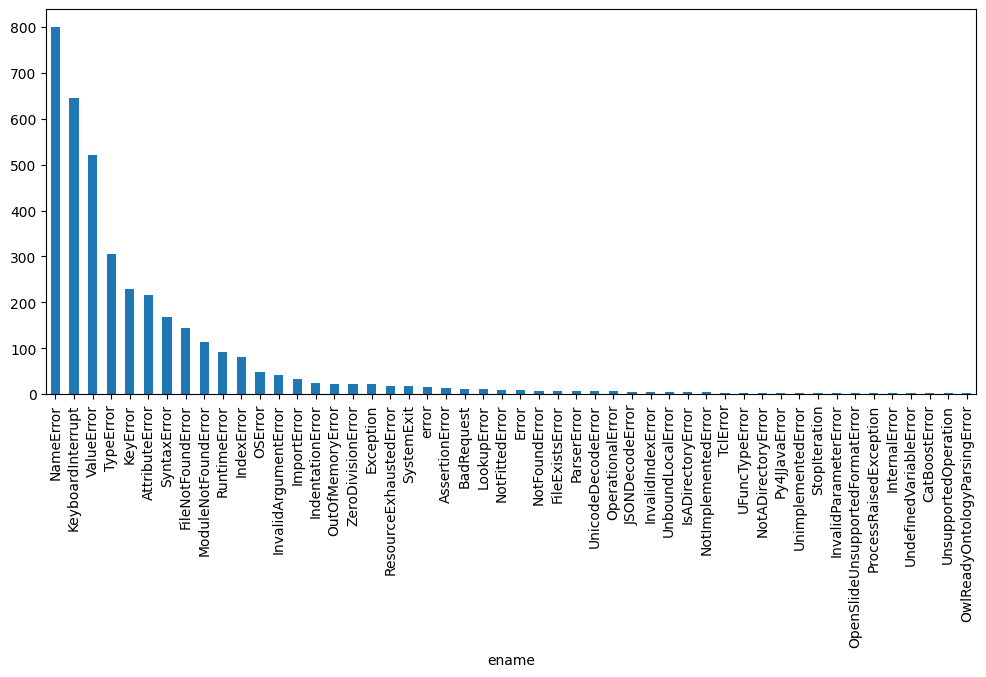

In [6]:
df_err["ename"].groupby([df_err["ename"]]).count().sort_values(ascending=0)[:50].plot(kind="bar", figsize=(12,5))

## 2. Filter notebooks in Github containing errors in their outputs

Parquet all (0-312): 

    Total number of notebooks containing error: 112430
    Total number of notebooks that cannot be decoded: 10602
    
    Total number of errors: 184961
    Total number of unique errors: 1675

    - Parquet 0-99: 

        Total number of notebooks containing error: 36119
        Total number of notebooks that cannot be decoded: 3392

        Total number of errors: 60623
        Total number of unique errors: 861

    - Parquet 100-199:

        Total number of notebooks containing error: 35848
        Total number of notebooks that cannot be decoded: 3376

        Total number of errors: 58013
        Total number of unique errors: 876

    - Parquet 200-311:

        Total number of notebooks containing error: 40463
        Total number of notebooks that cannot be decoded: 3834

        Total number of errors: 66325
        Total number of unique errors: 914


In [10]:
import util

# import time
# print(time.strftime("%H:%M:%S", time.localtime()))
# time.sleep(4000)
# print(time.strftime("%H:%M:%S", time.localtime()))

# nbdata_g

path = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_g/nbfiles'

path_des = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_g_error'
path_des2 = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_g_valueerror'

# path = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_g_error'

df2_err = util.filter_notebooks_with_errors(path, path_des = path_des, path_des2 = path_des2, is_resave = False)

# save the errors
path2_err = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g.csv'
# new file
df2_err.to_csv(path2_err, index=False, encoding='utf-8')
# expand existing file
#df2_err.to_csv(path2_err, mode='a', index=False, header=False, encoding='utf-8')

16:48:08
17:54:48

Started filtering:

Total number of notebooks containing error: 35848
Total number of notebooks that cannot be decoded: 3376


In [15]:
import pandas as pd

path2_err1 = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_0-99.csv'
path2_err2 = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_100-199.csv'
path2_err3 = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_200-312.csv'
df2_err1 = pd.read_csv(path2_err1, encoding='utf-8')
df2_err2 = pd.read_csv(path2_err2, encoding='utf-8')
df2_err3 = pd.read_csv(path2_err3, encoding='utf-8')
df2_err = pd.concat([df2_err1, df2_err2, df2_err3], axis=0)
df2_err.to_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all.csv', index=False, encoding='utf-8')

In [36]:
# read in all errors from the file
import pandas as pd

df2_err = pd.read_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all.csv', encoding='utf-8')

In [43]:
df2_err.head()

,fname,ename,evalue,traceback
0,00000-101-cookie-clicker-v2-checkpoint.ipynb,KeyboardInterrupt,NaN,['\x1b[0;31m----------------------------------...
1,00000-1012-demand-forecasting-data-prep-from-s...,OperationalError,"FATAL: no pg_hba.conf entry for host ""75.166....",['\x1b[0;31m----------------------------------...
2,00000-1017-heatmapseq2seq.ipynb,ValueError,"x and y must have same first dimension, but ha...",['\x1b[0;31m----------------------------------...
3,00000-1023-crawler-20190515-20190516.ipynb,ConnectionError,HTTPSConnectionPool(host='www.backpackers.com....,['\x1b[1;31m----------------------------------...
4,00000-1033-peer-solution-predicting-survival-t...,URLError,<urlopen error [Errno 11001] getaddrinfo failed>,['\x1b[1;31m----------------------------------...


In [38]:
df2_err.count()

fname        184961
ename        183760
evalue       165440
traceback    184961
dtype: int64

In [39]:
df2_err["fname"].nunique()

112430

<Axes: xlabel='ename'>

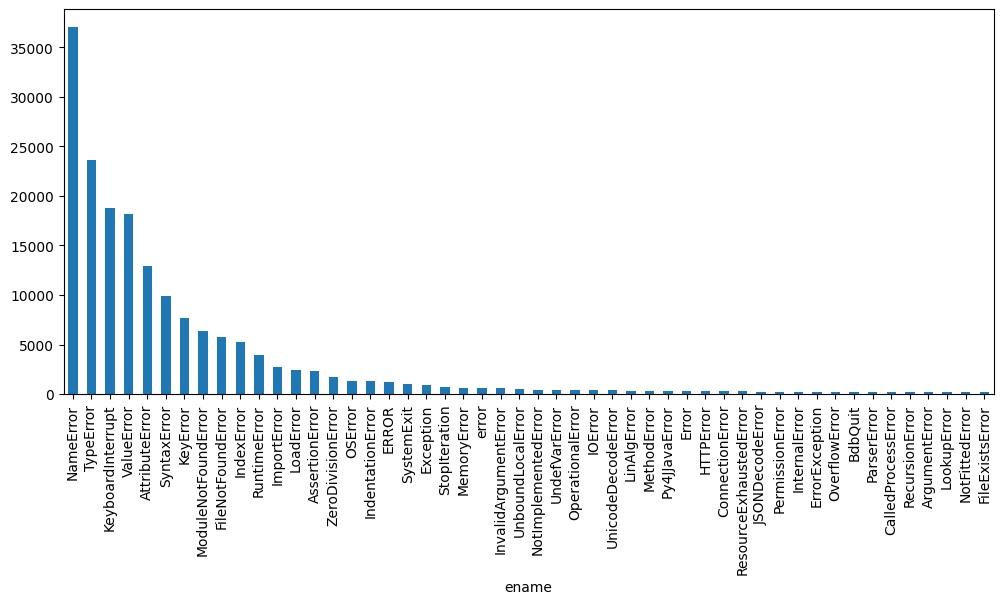

In [41]:
df2_err["ename"].groupby([df2_err["ename"]]).count().sort_values(ascending=0)[:50].plot(kind="bar", figsize=(12,5))

## 3. Data Processing for GitHub errors

### 3.1 Process the traceback column to readable texts

In [ ]:
import pandas as pd
import util

df2_err = pd.read_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all.csv', encoding='utf-8')

df2_err['traceback'] = df2_err['traceback'].map(util.parse_traceback)
df2_err.to_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_p.csv', index=False, encoding='utf-8')

### 3.2 Extract meaningful and short evalues from traceback for those with ignored evalues

Example:

    fname                             00000-1828-homework1-1.ipynb
    ename                                                NameError
    evalue                                                 ignored
    traceback    ['---------------------------------------------------------------------------', 'NameError                                 Traceback (most recent call last)', '<ipython-input-8-287bf352fb78> in <module>()\n      3 c1= nd.norm(nd.dot(A, B))\n      4 c= mx.ndarray.power(c1,2)\n----> 5 tic= time.time()\n      6 print(time.time() - tic)\n      7 \n', "NameError: name 'time' is not defined"]


In [85]:
import pandas as pd
import util

df2_err = pd.read_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_p.csv', encoding='utf-8')
df2_err_ignored = df2_err[df2_err['evalue']=='ignored']
df2_err_ignored.count()

fname        17478
ename        17466
evalue       17478
traceback    17478
dtype: int64

In [86]:
for index, row in df2_err_ignored.iterrows():
    res = util.get_evalue_ignored_from_traceback(row)
    if res:
        df2_err.loc[index, "evalue"] = res
df2_err.to_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_p2.csv', index=False, encoding='utf-8')

In [87]:
df2_err[df2_err['evalue']=='ignored'].count() # managed to filled 14146/17478 ignored evalues

fname        3332
ename        3332
evalue       3332
traceback    3332
dtype: int64

### 3.3 Programming Languages within (error) notebooks

#### 3.3.1 Exact language info from notebook meta data

In [3]:
import pandas as pd
import util

path = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_g_error'

res_lan = util.nb_language_exact(path)
res_lan.to_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_metalanguage.csv', index=False, encoding='utf-8')

No metadata in the notebook 00000-979-process-1m-dataset.ipynb
Copying notebook.. 00000-979-process-1m-dataset.ipynb
Copying notebook.. 00001-2234-flightsdb.ipynb
Copying notebook.. 00002-187-step03-passinganalysis.ipynb
No metadata in the notebook 00002-2841-03-project-classify-house-prices.ipynb
Copying notebook.. 00002-2841-03-project-classify-house-prices.ipynb
No metadata in the notebook 00005-988-pyensae-text2table.ipynb
Copying notebook.. 00005-988-pyensae-text2table.ipynb
Copying notebook.. 00006-1072-4-numpy-logisticregression.ipynb
Copying notebook.. 00011-3358-index.ipynb
Copying notebook.. 00013-2639-bootstraping-technique1-7-2021.ipynb
Copying notebook.. 00016-269-step06-lapdeficitanalysis.ipynb
No metadata in the notebook 00017-947-07-br.ipynb
Copying notebook.. 00017-947-07-br.ipynb
Copying notebook.. 00018-3224-batch-inputs-tf.ipynb
Copying notebook.. 00024-2071-practice-01.ipynb
Copying notebook.. 00026-329-session10-classroom.ipynb
Copying notebook.. 00027-622-main.ip

No metadata in the notebook 00263-3335-make-conds-key.ipynb
Copying notebook.. 00263-3335-make-conds-key.ipynb
No metadata in the notebook 00269-2544-admonition1.ipynb
Copying notebook.. 00269-2544-admonition1.ipynb
No metadata in the notebook 00271-194-interrupt.ipynb
Copying notebook.. 00271-194-interrupt.ipynb
No metadata in the notebook 00275-1240-resnet-pytorch-checkpoint.ipynb
Copying notebook.. 00275-1240-resnet-pytorch-checkpoint.ipynb
Copying notebook.. 00280-515-datathon-project-interventions-by-bias-factors.ipynb
Copying notebook.. 00282-2315-3-data-integration.ipynb
Copying notebook.. 00286-2547-symbolic-augmented-lagrangian.ipynb
Copying notebook.. 00287-2845-aprendeapensarcomounprogramadorconpython.ipynb
No metadata in the notebook 00301-1913-users.ipynb
Copying notebook.. 00301-1913-users.ipynb
Copying notebook.. 00302-2331-00-intro-to-pandas.ipynb
No metadata in the notebook 00302-2891-queues-in-python.ipynb
Copying notebook.. 00302-2891-queues-in-python.ipynb
No metada

In [4]:
112303/112430 # can extract language info from meta data

0.9988704082540247

In [10]:
res_lan

,fname,kernel_language,kernel_name,language_laninfo
0,00000-101-cookie-clicker-v2-checkpoint.ipynb,python,python3,python
1,00000-1012-demand-forecasting-data-prep-from-s...,python,test,python
2,00000-1017-heatmapseq2seq.ipynb,python,python3,python
3,00000-1023-crawler-20190515-20190516.ipynb,python,crawler,python
4,00000-1033-peer-solution-predicting-survival-t...,python,python3,python
...,...,...,...,...
112425,00311-934-untitled.ipynb,python,python3,python
112426,00311-973-jtj-eigenmodes.ipynb,julia,julia-1.3,julia
112427,00311-984-working-with-mask-during-horizontal-...,python,conda-root-py,python
112428,00311-987-titanic.ipynb,unknown,python3,unknown


#### 3.3.2 Exact remaining unknown language info from Guesslang library

The [guesslang library](https://guesslang.readthedocs.io/en/latest/contents.html#install-from-pypi) requires a very old version of tensorflow (2.5.0, python version 3.6-3.9). Remember to switch to a suitable environment to install and use it.

In [16]:
import util

path_nolan = 'C:/Users/yirwa29/Downloads/Dataset-Nb/nbdata_g_data_no_laninfo'
util.nb_to_py(path_nolan)

In [28]:
df_lan = py_language_detection(path_nolan)
df_lan.language.value_counts()

Python     100
unknown     14
R            5
Julia        4
Lua          2
Scala        1
Haskell      1
Name: language, dtype: int64

In [29]:
df_lan.to_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_detectlanguage.csv', index=False, encoding='utf-8')

#### 3.3.3 Combine the results from metalanguage exaction and language detection


In [21]:
import pandas as pd
import util

res_lan = pd.read_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_metalanguage.csv', encoding='utf-8')
res_lan2 = pd.read_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_detectlanguage.csv', encoding='utf-8')

In [22]:
res_lan2['fname'] = res_lan2.fname.map(lambda a: a[:-3]+'.ipynb')
res_lan2['language'] = res_lan2.language.map(str.lower)

res_lan['language_laninfo']= res_lan['language_laninfo'].apply(util.simple_language_parser)
res_lan['kernel_language']= res_lan['kernel_language'].apply(util.simple_language_parser)
res_lan['kernel_name']= res_lan['kernel_name'].apply(util.simple_language_parser)

res_lan['language']= res_lan['language_laninfo']
res_lan.loc[res_lan['language']=='unknown', 'language'] = res_lan['kernel_language'][res_lan['language']=='unknown']
res_lan.loc[res_lan['language']=='unknown', 'language'] = res_lan['kernel_name'][res_lan['language']=='unknown']

In [26]:
df_tmp = res_lan[res_lan['language'].eq('unknown')].merge(res_lan2, on='fname', how='left')
for i, row in df_tmp.iterrows():
    res_lan.loc[res_lan['fname']==row['fname'], 'language'] = row['language_y']

In [32]:
res_lan[['fname', 'language']].to_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_language.csv', index=False, encoding='utf-8')

#### 3.3.4 Language distribution in GitHub ERROR dataset

In [36]:
import pandas as pd

res_lan = pd.read_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_language.csv', encoding='utf-8')

In [41]:
res_lan.language.value_counts()[:5]/len(res_lan)

language
python    0.970052
julia     0.015298
r         0.006564
scala     0.001183
shell     0.001138
Name: count, dtype: float64

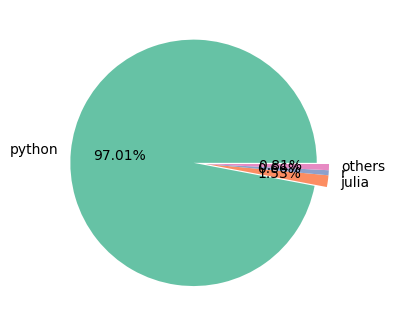

In [39]:
# tried to plot, looks ugly. May just use table

import matplotlib.pyplot as plt
import seaborn as sns 

#the full dataframe
lan_df = pd.DataFrame(
    data = {'language': res_lan.language.value_counts().index, 
            'value' :res_lan.language.value_counts().values},
    ).sort_values('value', ascending = False)

#the top n
n_top = 3
lan_df_1 = lan_df[:n_top].copy()

#others
lan_df_2 = pd.DataFrame(data = {
    'language' : ['others'],
    'value' : [lan_df['value'][n_top:].sum()]
})

# combine
lan_df_new = pd.concat([lan_df_1, lan_df_2])

explode = (0.1, 0, 0, 0)

plt.figure(figsize=(4,4))
plt.tight_layout()
plt.pie(
    x = lan_df_new['value'], 
    explode = explode, 
    labels = lan_df_new['language'],
    autopct = '%1.2f%%',
    colors=sns.color_palette('Set2')
)
plt.show()

#### 3.3.5 Add language info to the error dataset

In [1]:
import pandas as pd

res_err = pd.read_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_p2.csv', encoding='utf-8')
res_lan = pd.read_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_language.csv', encoding='utf-8')

In [7]:
res_merged = res_err.merge(res_lan, left_on='fname', right_on='fname').reindex(columns=['fname', 'ename', 'evalue', 'traceback', 'language'])

In [10]:
res_merged.to_csv('C:/Users/yirwa29/Downloads/Dataset-Nb/nberror_g_all_p3.csv', index=False, encoding='utf-8')

## [deprecated] Get commit urls from the table obtained in bigquery public dataset

But the public dataset hasn't been updated for over a year

### Get urls for the commits

In [ ]:
# This is via gh API call, it turns out no need to do this

import pandas as pd
import re
import json
import numpy as np
import time

def escape_ansi(line, max_retries: int = 10,):
    ansi_escape = re.compile(r'(?:\x1B[@-_]|[\x80-\x9F])[0-?]*[ -/]*[@-~]')
    res = ansi_escape.sub('', line)
    num_retries = 0
    if res==res:
        while True:
            try:
                jsonobj = json.loads(res)
                if len(jsonobj)>0:
                    return jsonobj[0]['url']
                else:
                    print("error: decoding url", jsonobj)
                    return None
            # Retry on specific errors
            except ValueError:  # includes simplejson.decoder.JSONDecodeError
                print('Decoding JSON has failed due to: ', res, 'Retrying')
                num_retries += 1
                if num_retries > max_retries:
                    print(f"Maximum number of retries ({max_retries}) exceeded.")
                    return None
                delay = 60
                # Sleep for the delay
                time.sleep(delay)
    else:
        print("error: did not get any url from GitHub API")
        return None
    
def request_commits_with_sha(data_commits_sample):
    urls = []
    for commit in data_commits_sample:
        if commit!=commit:
            print('none sha ---- skip', commit)
            continue
        s="gh search commits --hash={0} --json url".format(commit)
        o = !$s
        url = escape_ansi(o.nlstr)
        if url:
            urls.append(url)
        else: 
            print('none url retrived ---- skip', commit)
    return urls

In [ ]:
# commits data from bigquery
data = pd.read_csv('C:/Users/yirwa29/Downloads/jupyter_nbs_saml/target_nbs/notebook_commits.csv')
data_commits = np.unique(data['commit'])
print('total amount of unique commits:', len(data_commits))

In [64]:
# This is via put strings together, it is simple and correct, we use this

def get_commit_url(commit_id, repo_name):
    return "https://github.com/{0}/commit/{1}".format(repo_name, commit_id)

def get_all_urls():
    urls = []
    for index, row in data.iterrows():
        url = get_commit_url(row['commit'], row['name'])
        urls.append(url)
    return urls

urls = get_all_urls()

# save all the commit urls to the csv file
import pandas as pd
data['url'] = urls
data.to_csv('C:/Users/yirwa29/Downloads/jupyter_nbs_saml/target_nbs/notebook_commits_url.csv', index=False)

In [67]:
# URL Wrapper for printing clickable urls

from dataclasses import dataclass

@dataclass(frozen=True)
class Url:
    """Wrapper around a URL string to provide nice display in IPython environments."""

    __url: str

    def _repr_html_(self):
        """HTML link to this URL."""
        return f'<a href="{self.__url}">{self.__url}</a>'

    def __str__(self):
        """Return the underlying string."""
        return self.__url

In [75]:
data = pd.read_csv('C:/Users/yirwa29/Downloads/jupyter_nbs_saml/target_nbs/notebook_commits_url.csv')
data_commiturls = np.unique(data['url'])
print('total amount of commits:', len(data_commiturls))

sample_size = 100
data_commiturls_sample = np.random.choice(data_commiturls, sample_size, replace=False)

data_checked = pd.read_csv('C:/Users/yirwa29/Downloads/jupyter_nbs_saml/target_nbs/checked.csv')
urls_checked = np.unique(data_checked['url'])
print('total amount of checked commits:', len(urls_checked))

data_commiturls_sample = np.setdiff1d(data_commiturls_sample, urls_checked)
print('total amount of sampled commits:', len(data_commiturls_sample))

total amount of commits: 3448
total amount of checked commits: 30
total amount of sampled commits: 99


In [76]:
for i in data_commiturls_sample:
    print(Url(i))

https://github.com/GoogleCloudPlatform/asl-ml-immersion/commit/8ce0706cc0321b4f9b3a3fdd8bde142e13607eb9
https://github.com/GoogleCloudPlatform/dataproc-templates/commit/606a3729332d1ef5fcfa94e9962efdf7cb28bc2b
https://github.com/GoogleCloudPlatform/dataproc-templates/commit/a9e4ae1859708e045af13d4b84d35f128b2f4907
https://github.com/GoogleCloudPlatform/vertex-ai-samples/commit/095b0bd6282d7817d5677c06f4d3c1fb2504f9d8
https://github.com/GoogleCloudPlatform/vertex-ai-samples/commit/0d346b136e7d4cc6ee43a8528bf78a3ca5380c8d
https://github.com/GoogleCloudPlatform/vertex-ai-samples/commit/0e811868d3d982bd88375f3f8c8b4c5f234a6aee
https://github.com/GoogleCloudPlatform/vertex-ai-samples/commit/168c5c2f1561f40ca604029c3e34291ca21589cf
https://github.com/GoogleCloudPlatform/vertex-ai-samples/commit/2c9c8db15c60b5c12abbb39e1fdf5e6fa9691e8c
https://github.com/GoogleCloudPlatform/vertex-ai-samples/commit/351fc3e4d3a1a61a3f24c92a2e3f07e27b690fb7
https://github.com/GoogleCloudPlatform/vertex-ai-sampl

Found coding errors:

- shape error and still not fixed: [OpenMined/PySyft](https://github.com/OpenMined/PySyft/commit/f18baa0e519f12ac009579a4dc6d64b074eb6ffc)
- maybe a fixed error: [google/learned_optimization](https://github.com/google/learned_optimization/commit/47c990af061cab47f8d6fbd871f6d5d43827cdcd)

In [58]:
# save the checked ones

checked_dicts = []
# for i in range(30):
#     d = {'commit':data_commits_sample[i], 'url':urls[i]}
#     checked_dicts.append(d)

import csv 
field_names = ['commit', 'url'] 
with open('C:/Users/yirwa29/Downloads/jupyter_nbs_saml/target_nbs/checked.csv', 'a') as csvfile: 
    writer = csv.DictWriter(csvfile, fieldnames = field_names) 
    for x in checked_dicts:
        writer.writerow(x)